In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [39]:
# read in the csv data into a pandas data frame and set the date as the index
#nwdf = pd.read_pickle("./weather_data_cleaned.pkl")

df = pd.read_csv('end-part2_df.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
#nwdf.describe().T

df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [40]:
# execute the info() function
#nwdf.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2015-01-04 to 2017-09-27
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   meantempm        997 non-null    int64  
 1   maxtempm         997 non-null    int64  
 2   mintempm         997 non-null    int64  
 3   meantempm_1      997 non-null    float64
 4   meantempm_2      997 non-null    float64
 5   meantempm_3      997 non-null    float64
 6   meandewptm_1     997 non-null    float64
 7   meandewptm_2     997 non-null    float64
 8   meandewptm_3     997 non-null    float64
 9   meanpressurem_1  997 non-null    float64
 10  meanpressurem_2  997 non-null    float64
 11  meanpressurem_3  997 non-null    float64
 12  maxhumidity_1    997 non-null    float64
 13  maxhumidity_2    997 non-null    float64
 14  maxhumidity_3    997 non-null    float64
 15  minhumidity_1    997 non-null    float64
 16  minhumidity_2    997 non-null    float64
 17  minhu

In [41]:
# First drop the maxtempm and mintempm from the dataframe
#df = nwdf.drop(['tempLow', 'tempHigh'], axis=1)

df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
#X = df[[col for col in df.columns if col != 'tempAvg']]

X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
#y = df['tempAvg']


y = df['meantempm']

In [42]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [43]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   797, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [44]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [45]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model', loss_reduction=tf.keras.losses.Reduction.SUM)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcbfe874710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [47]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-0
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 9990842.0, step = 1
INFO:tensorflow:global_step/sec: 16.0439
INFO:tensorflow:loss = 40919.58, step = 101 (6.231 sec)
INFO:tensorflow:global_step/sec: 16.0437
INFO:tensorflow:loss = 28417.883, step = 201 (6.233 sec)
INFO:tensorflow:global_step/sec: 17.0756
INFO:tensorflow:loss = 20995.697, step = 301 (5.856 sec)
INFO:tensorflow:Saving checkpoints for 400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 16729.102.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting ev

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:28:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:28:32
INFO:tensorflow:Saving dict for global step 1600: average_loss = 17.27076, global_step = 1600, label/mean = 14.25, loss = 1727.076, prediction/mean = 13.585302
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1600: tf_wx_model/model.ckpt-1600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1600 into tf_

INFO:tensorflow:Loss for final step: 6747.0474.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:30:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:30:27
INFO:tensorflow:Saving dict for global step 3200: average_loss = 14.857112, global_step = 3200, label/mean = 14.25, loss = 1485.7112, prediction/mean = 13.619385
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3200: tf_wx_model/model.ckpt-3200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:30:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3200
INFO:tensorflow:Running local_init_o

INFO:tensorflow:loss = 7190.21, step = 4401
INFO:tensorflow:global_step/sec: 18.0067
INFO:tensorflow:loss = 5922.3315, step = 4501 (5.555 sec)
INFO:tensorflow:global_step/sec: 19.3249
INFO:tensorflow:loss = 7009.8315, step = 4601 (5.175 sec)
INFO:tensorflow:global_step/sec: 17.5692
INFO:tensorflow:loss = 6225.9604, step = 4701 (5.692 sec)
INFO:tensorflow:Saving checkpoints for 4800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6929.645.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:32:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-4800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:32:23
INFO:tensorflow:Saving dict for global step 4800: average_loss = 13.720966, global_step = 4800, label/mean = 14.25, loss = 1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6000 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6367.4404, step = 6001
INFO:tensorflow:global_step/sec: 17.3632
INFO:tensorflow:loss = 6972.3013, step = 6101 (5.761 sec)
INFO:tensorflow:global_step/sec: 17.7598
INFO:tensorflow:loss = 6795.544, step = 6201 (5.630 sec)
INFO:tensorflow:global_step/sec: 17.0382
INFO:tensorflow:loss = 6399.7637, step = 6301 (5.869 sec)
INFO:tensorflow:Saving checkpoints for 6400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 7245.3047.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:34:20Z
INFO:tensorflow:Graph wa

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:35:54
INFO:tensorflow:Saving dict for global step 7600: average_loss = 12.822013, global_step = 7600, label/mean = 14.25, loss = 1282.2013, prediction/mean = 13.713227
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7600: tf_wx_model/model.ckpt-7600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-7600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7600 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6684.9087, step = 7601
INFO:tensorflow:global_step/sec: 17.5836
INFO:tensorflow:loss = 7199.119, step = 7701 (5.690 sec)
INFO:tensorflow:global_step/sec: 18.7815
INFO:tensorflow:loss = 6231.4272

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9200: tf_wx_model/model.ckpt-9200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:37:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-9200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:37:54
INFO:tensorflow:Saving dict for global step 9200: average_loss = 12.458458, global_step = 9200, label/mean = 14.25, loss = 1245.8458, prediction/mean = 13.770012
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9200: tf_wx_model/model.ckpt-9200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-9200
INFO:tensorflow:Running local_init

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:39:44
INFO:tensorflow:Saving dict for global step 10800: average_loss = 12.254988, global_step = 10800, label/mean = 14.25, loss = 1225.4988, prediction/mean = 13.740535
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10800: tf_wx_model/model.ckpt-10800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:39:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:39:46
INFO:tensorflow:Saving dict for global step 10800: average_loss = 12.

INFO:tensorflow:loss = 5756.249, step = 12101 (5.975 sec)
INFO:tensorflow:global_step/sec: 18.734
INFO:tensorflow:loss = 6895.996, step = 12201 (5.338 sec)
INFO:tensorflow:global_step/sec: 18.6941
INFO:tensorflow:loss = 6583.0684, step = 12301 (5.349 sec)
INFO:tensorflow:Saving checkpoints for 12400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6602.082.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:41:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-12400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:41:33
INFO:tensorflow:Saving dict for global step 12400: average_loss = 12.085484, global_step = 12400, label/mean = 14.25, loss = 1208.5483, prediction/mean = 13.723629
INFO:tensorflow:Saving 'checkpoint_path' su

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-13600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13600 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6231.04, step = 13601
INFO:tensorflow:global_step/sec: 17.7906
INFO:tensorflow:loss = 5477.772, step = 13701 (5.622 sec)
INFO:tensorflow:global_step/sec: 19.136
INFO:tensorflow:loss = 6899.3667, step = 13801 (5.226 sec)
INFO:tensorflow:global_step/sec: 18.4366
INFO:tensorflow:loss = 6408.7725, step = 13901 (5.424 sec)
INFO:tensorflow:Saving checkpoints for 14000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6170.628.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:43:24Z
INFO:tensorflow:Graph

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:44:49
INFO:tensorflow:Saving dict for global step 15200: average_loss = 11.835186, global_step = 15200, label/mean = 14.25, loss = 1183.5186, prediction/mean = 13.720972
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15200: tf_wx_model/model.ckpt-15200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-15200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15200 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6428.6533, step = 15201
INFO:tensorflow:global_step/sec: 17.9618
INFO:tensorflow

INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:46:34
INFO:tensorflow:Saving dict for global step 16800: average_loss = 11.633136, global_step = 16800, label/mean = 14.25, loss = 1163.3136, prediction/mean = 13.804256
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16800: tf_wx_model/model.ckpt-16800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:46:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-16800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:46:35
INFO:tensorflow:Saving dict for global step 16800: average_loss = 11.633136, global_step = 16800, label/mean = 14.25, loss = 1163.3136, prediction/mean = 13.804256
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16800: tf_wx_model/model.ckpt-1

INFO:tensorflow:loss = 5927.896, step = 18301 (4.886 sec)
INFO:tensorflow:Saving checkpoints for 18400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5546.2944.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:48:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-18400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:48:20
INFO:tensorflow:Saving dict for global step 18400: average_loss = 11.555388, global_step = 18400, label/mean = 14.25, loss = 1155.5388, prediction/mean = 13.758393
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18400: tf_wx_model/model.ckpt-18400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:48:20Z
INFO:t

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-19600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19600 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5490.2812, step = 19601
INFO:tensorflow:global_step/sec: 19.3817
INFO:tensorflow:loss = 5769.851, step = 19701 (5.161 sec)
INFO:tensorflow:global_step/sec: 20.3435
INFO:tensorflow:loss = 4914.276, step = 19801 (4.915 sec)
INFO:tensorflow:global_step/sec: 20.0144
INFO:tensorflow:loss = 6586.6323, step = 19901 (4.996 sec)
INFO:tensorflow:Saving checkpoints for 20000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5573.232.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:50:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runni

INFO:tensorflow:Finished evaluation at 2020-11-30-22:51:28
INFO:tensorflow:Saving dict for global step 21200: average_loss = 11.393826, global_step = 21200, label/mean = 14.25, loss = 1139.3826, prediction/mean = 13.779496
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21200: tf_wx_model/model.ckpt-21200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-21200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21200 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5761.332, step = 21201
INFO:tensorflow:global_step/sec: 18.3114
INFO:tensorflow:loss = 6103.7, step = 21301 (5.462 sec)
INFO:tensorflow:global_step/sec: 19.2976
INFO:tensorflow:loss = 5980.248, step = 21401 (5.182 sec)
INFO:tensorflow:global_step/sec: 19.2036
INFO:tensor

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22800: tf_wx_model/model.ckpt-22800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:53:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-22800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:53:17
INFO:tensorflow:Saving dict for global step 22800: average_loss = 11.356912, global_step = 22800, label/mean = 14.25, loss = 1135.6912, prediction/mean = 13.744842
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22800: tf_wx_model/model.ckpt-22800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-22800
INFO:tensorflow:Running lo

INFO:tensorflow:Starting evaluation at 2020-11-30T22:55:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-24400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:55:01
INFO:tensorflow:Saving dict for global step 24400: average_loss = 11.252366, global_step = 24400, label/mean = 14.25, loss = 1125.2366, prediction/mean = 13.772575
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24400: tf_wx_model/model.ckpt-24400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:55:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-24400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:55:03
INFO:tens

INFO:tensorflow:global_step/sec: 19.0273
INFO:tensorflow:loss = 5356.3467, step = 25701 (5.257 sec)
INFO:tensorflow:global_step/sec: 20.2721
INFO:tensorflow:loss = 5949.9507, step = 25801 (4.933 sec)
INFO:tensorflow:global_step/sec: 20.1704
INFO:tensorflow:loss = 5078.1606, step = 25901 (4.958 sec)
INFO:tensorflow:Saving checkpoints for 26000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6244.7617.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:56:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-22:56:46
INFO:tensorflow:Saving dict for global step 26000: average_loss = 11.220877, global_step = 26000, label/mean = 14.25, loss = 1122.0876, prediction/mean = 13.73893

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-27200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 27200 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5995.083, step = 27201
INFO:tensorflow:global_step/sec: 18.3479
INFO:tensorflow:loss = 6171.9053, step = 27301 (5.451 sec)
INFO:tensorflow:global_step/sec: 20.263
INFO:tensorflow:loss = 5705.175, step = 27401 (4.935 sec)
INFO:tensorflow:global_step/sec: 19.9543
INFO:tensorflow:loss = 5115.8223, step = 27501 (5.011 sec)
INFO:tensorflow:Saving checkpoints for 27600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6123.288.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T22:58:30Z
INFO:tensorflow:Grap

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-22:59:54
INFO:tensorflow:Saving dict for global step 28800: average_loss = 11.167092, global_step = 28800, label/mean = 14.25, loss = 1116.7092, prediction/mean = 13.705837
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 28800: tf_wx_model/model.ckpt-28800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 28800 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5171.652, step = 28801
INFO:tensorflow:global_step/sec: 19.3569
INFO:tensorflow:loss = 6276.743, step = 28901 (5.167 

INFO:tensorflow:Finished evaluation at 2020-11-30-23:01:41
INFO:tensorflow:Saving dict for global step 30400: average_loss = 11.107243, global_step = 30400, label/mean = 14.25, loss = 1110.7242, prediction/mean = 13.720816
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30400: tf_wx_model/model.ckpt-30400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:01:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-30400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-23:01:43
INFO:tensorflow:Saving dict for global step 30400: average_loss = 11.107243, global_step = 30400, label/mean = 14.25, loss = 1110.7242, prediction/mean = 13.720816
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30400: tf_wx_model/model.ckpt-30400
INFO:tensorflow:Calling mode

INFO:tensorflow:Saving checkpoints for 32000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5649.641.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:03:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-32000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-23:03:28
INFO:tensorflow:Saving dict for global step 32000: average_loss = 10.967599, global_step = 32000, label/mean = 14.25, loss = 1096.7599, prediction/mean = 13.82687
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 32000: tf_wx_model/model.ckpt-32000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:03:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring par

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 33200 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5643.2036, step = 33201
INFO:tensorflow:global_step/sec: 19.3512
INFO:tensorflow:loss = 4999.8057, step = 33301 (5.169 sec)
INFO:tensorflow:global_step/sec: 20.5523
INFO:tensorflow:loss = 5081.204, step = 33401 (4.866 sec)
INFO:tensorflow:global_step/sec: 20.8612
INFO:tensorflow:loss = 5226.544, step = 33501 (4.794 sec)
INFO:tensorflow:Saving checkpoints for 33600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4652.131.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:05:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-33600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Fini

INFO:tensorflow:Saving dict for global step 34800: average_loss = 11.075709, global_step = 34800, label/mean = 14.25, loss = 1107.5709, prediction/mean = 13.668589
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 34800: tf_wx_model/model.ckpt-34800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-34800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 34800 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5375.6104, step = 34801
INFO:tensorflow:global_step/sec: 18.3137
INFO:tensorflow:loss = 4803.1885, step = 34901 (5.462 sec)
INFO:tensorflow:global_step/sec: 19.3724
INFO:tensorflow:loss = 5721.72, step = 35001 (5.162 sec)
INFO:tensorflow:global_step/sec: 19.2579
INFO:tensorflow:loss = 5376.6353, step = 35101 (5.193 sec)
INFO:ten

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 36400: tf_wx_model/model.ckpt-36400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:08:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-23:08:25
INFO:tensorflow:Saving dict for global step 36400: average_loss = 10.998673, global_step = 36400, label/mean = 14.25, loss = 1099.8673, prediction/mean = 13.708212
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 36400: tf_wx_model/model.ckpt-36400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-36400
INFO:tensorflow:Running lo

INFO:tensorflow:Starting evaluation at 2020-11-30T23:10:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-23:10:12
INFO:tensorflow:Saving dict for global step 38000: average_loss = 10.960785, global_step = 38000, label/mean = 14.25, loss = 1096.0785, prediction/mean = 13.716527
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 38000: tf_wx_model/model.ckpt-38000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:10:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-11-30-23:10:14
INFO:tens

INFO:tensorflow:global_step/sec: 17.9329
INFO:tensorflow:loss = 5584.659, step = 39301 (5.578 sec)
INFO:tensorflow:global_step/sec: 19.2147
INFO:tensorflow:loss = 5659.631, step = 39401 (5.205 sec)
INFO:tensorflow:global_step/sec: 18.837
INFO:tensorflow:loss = 5454.9346, step = 39501 (5.308 sec)
INFO:tensorflow:Saving checkpoints for 39600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5500.039.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-11-30T23:12:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-39600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-11-30-23:12:02
INFO:tensorflow:Saving dict for global step 39600: average_loss = 10.854633, global_step = 39600, label/mean = 14.25, loss = 1085.4634, prediction/mean = 13.795014
IN

In [48]:
evaluations[0]

{'average_loss': 36.10491,
 'label/mean': 14.25,
 'loss': 3610.4912,
 'prediction/mean': 13.362683,
 'global_step': 400}

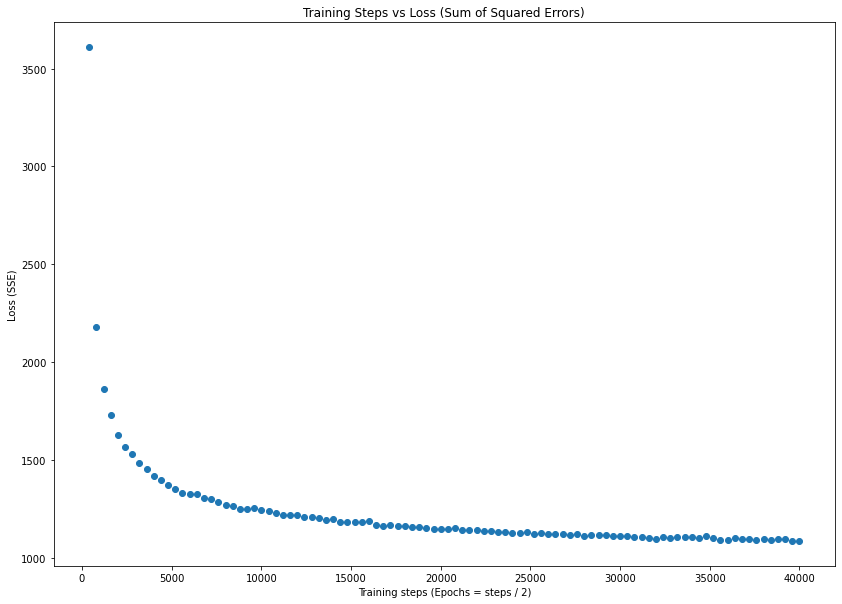

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.title('Training Steps vs Loss (Sum of Squared Errors)')
plt.savefig('Loss_v_trainingsteps.pdf')
plt.show()



In [50]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.89
The Mean Absolute Error: 2.97 degrees Celcius
The Median Absolute Error: 2.28 degrees Celcius


In [51]:
predictions

array([ 7.0327077e+00,  2.4799273e+00,  7.4645314e+00,  1.2223259e+01,
        2.2302170e+01,  1.4732727e+01,  2.3819847e+01,  2.0792389e+01,
        1.6631569e+01,  1.5464333e+01,  2.3082375e+01,  1.4894737e+01,
        8.0380554e+00,  9.0501862e+00,  2.2693977e+01,  1.2671364e+01,
       -4.0085063e+00,  9.3408966e+00,  8.7148819e+00,  8.0630722e+00,
        5.1157384e+00,  1.1909317e+01, -4.6502147e+00,  1.9428856e+01,
        2.1041603e+01,  3.8387454e+00,  3.4561923e+00,  2.7120068e+01,
       -2.1303785e+00,  1.8866051e+01,  2.3048327e+00,  2.0577431e+01,
        2.4706497e+01,  2.0202530e+01,  2.4478989e+01,  2.2841278e+01,
        2.3422363e+01,  7.5122228e+00,  4.9928517e+00,  2.3255932e+01,
        2.5676723e+01,  6.6326146e+00,  1.8912102e+01,  1.8042717e+01,
        1.2096138e+01,  1.4630592e+01,  2.6498413e+01,  1.9722862e+01,
        2.3821686e+01,  8.3692093e+00, -9.5869980e+00,  4.5473753e-03,
        2.2159904e+01,  1.7678726e+01,  2.0268120e+01,  1.0049477e+01,
      

In [52]:
X_test

,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2015-11-19,7.0,11.0,13.0,2.0,9.0,12.0,997.0,998.0,1004.0,93.0,...,7.0,1014.0,1002.0,1009.0,991.0,993.0,1001.0,0.76,24.13,1.27
2017-01-03,1.0,-1.0,-2.0,0.0,-6.0,-8.0,1012.0,1014.0,1013.0,100.0,...,-9.0,1018.0,1017.0,1016.0,1009.0,1012.0,1007.0,0.00,0.00,0.00
2015-10-31,4.0,6.0,8.0,1.0,-2.0,1.0,1015.0,1015.0,1009.0,92.0,...,-6.0,1018.0,1018.0,1011.0,1010.0,1011.0,1006.0,5.84,0.00,0.00
2015-05-22,12.0,9.0,7.0,4.0,6.0,3.0,1025.0,1024.0,1027.0,100.0,...,1.0,1026.0,1026.0,1030.0,1022.0,1022.0,1022.0,0.00,0.51,2.29
2015-09-11,22.0,22.0,22.0,17.0,17.0,18.0,1014.0,1015.0,1013.0,90.0,...,17.0,1017.0,1018.0,1015.0,1013.0,1012.0,1010.0,4.06,7.62,9.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-01,26.0,22.0,24.0,21.0,18.0,18.0,1012.0,1015.0,1017.0,90.0,...,14.0,1016.0,1017.0,1019.0,1010.0,1013.0,1015.0,7.37,0.76,3.56
2015-06-04,23.0,21.0,19.0,17.0,14.0,11.0,1012.0,1014.0,1019.0,100.0,...,7.0,1015.0,1017.0,1021.0,1008.0,1011.0,1017.0,21.84,0.00,0.00
2017-08-10,21.0,21.0,21.0,17.0,16.0,16.0,1018.0,1021.0,1020.0,97.0,...,14.0,1020.0,1023.0,1022.0,1016.0,1019.0,1017.0,0.00,0.00,0.00
